<a href="https://colab.research.google.com/github/s-shahd-h/Telco-Customer-Churn-classification/blob/main/Telco_Customer_Churn_classiication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [179]:
data=pd.read_csv(path+"/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head(13)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [181]:
data.duplicated().sum()

0

In [182]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [183]:
for col in data.columns:
    print(col,data[col].unique())


customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

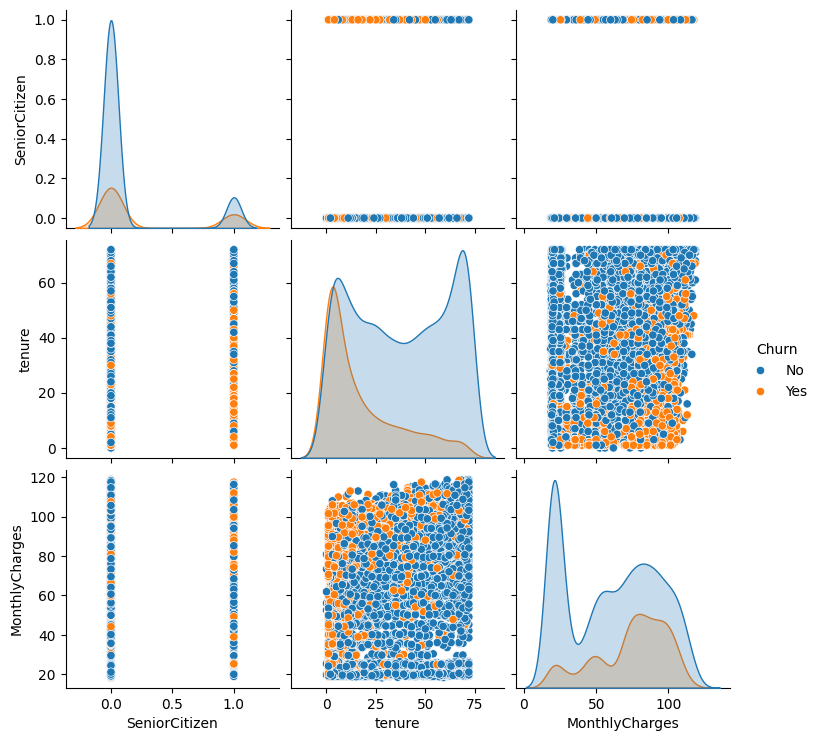

In [184]:
sns.pairplot(data, hue='Churn')

In [185]:
services=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
services_data=data[services]
services_data

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,Yes,No,No,No,No
1,Yes,No,Yes,No,No,No
2,Yes,Yes,No,No,No,No
3,Yes,No,Yes,Yes,No,No
4,No,No,No,No,No,No
...,...,...,...,...,...,...
7038,Yes,No,Yes,Yes,Yes,Yes
7039,No,Yes,Yes,No,Yes,Yes
7040,Yes,No,No,No,No,No
7041,No,No,No,No,No,No


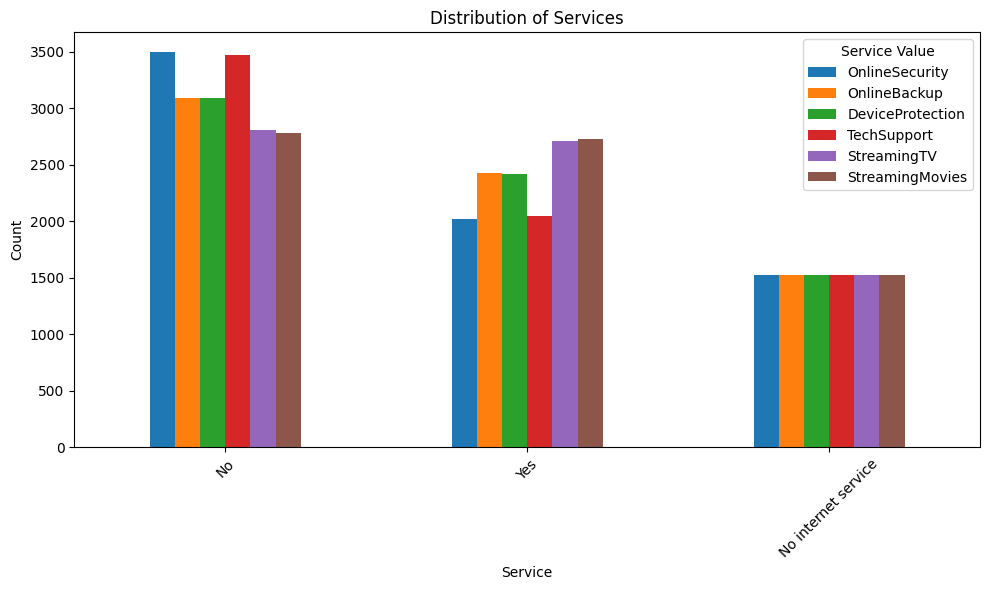

In [186]:
# Calculate the distribution of each service
service_counts = services_data.apply(pd.value_counts)

# Create the bar plot
service_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Services')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Service Value')
plt.tight_layout()
plt.show()

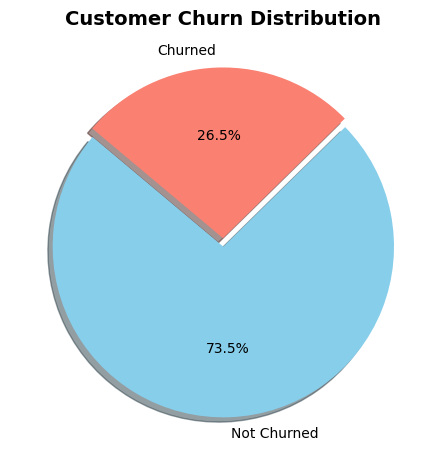

In [187]:
data["TotalCharges"] = data["TotalCharges"].fillna(0.0)
data['Churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    labels=['Not Churned', 'Churned'],
    startangle=140,
    explode=(0, 0.05),
    shadow=True
)
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')  # Hides the y-label for a cleaner look
plt.tight_layout()
plt.show();

<Axes: xlabel='InternetService', ylabel='count'>

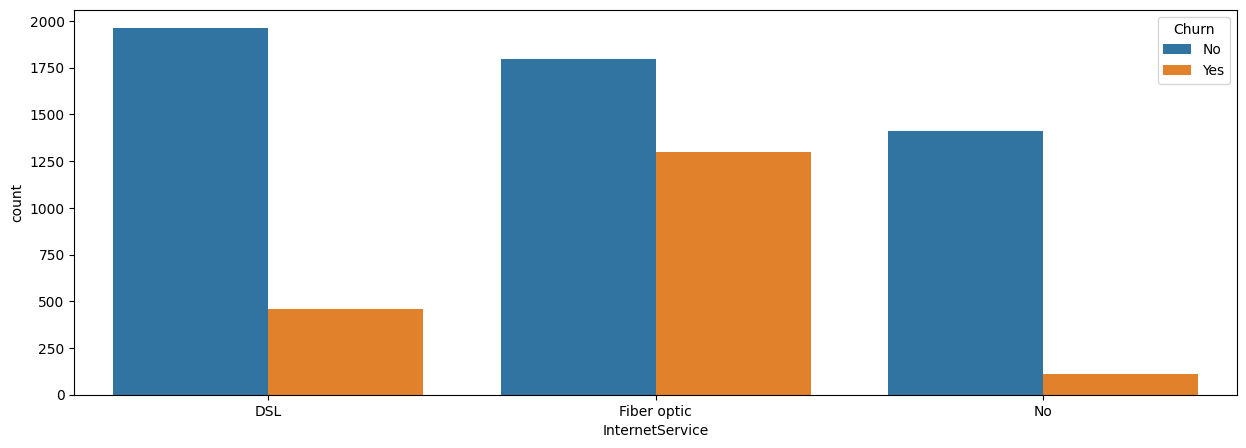

In [188]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['InternetService'],data=data,hue='Churn')

In [189]:
relatives=['Partner','Dependents']
relatives_data=data[relatives]
relatives_data

,Partner,Dependents
0,Yes,No
1,No,No
2,No,No
3,No,No
4,No,No
...,...,...
7038,Yes,Yes
7039,Yes,Yes
7040,Yes,Yes
7041,Yes,No


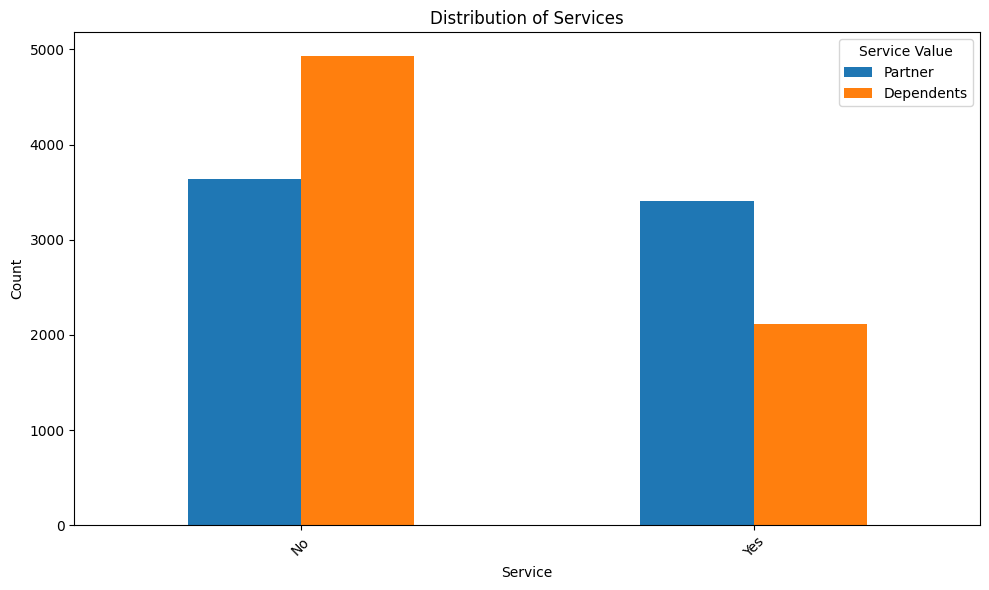

In [190]:

relatives_count = relatives_data.apply(pd.value_counts)

relatives_count.plot(kind='bar', figsize=(10, 6), )
plt.title('Distribution of Services')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Service Value')
plt.tight_layout()
plt.show()

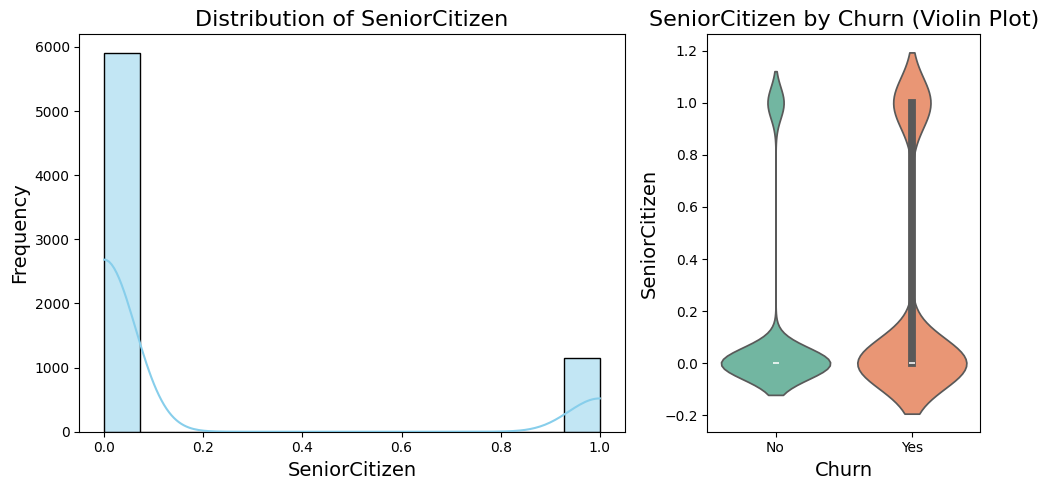

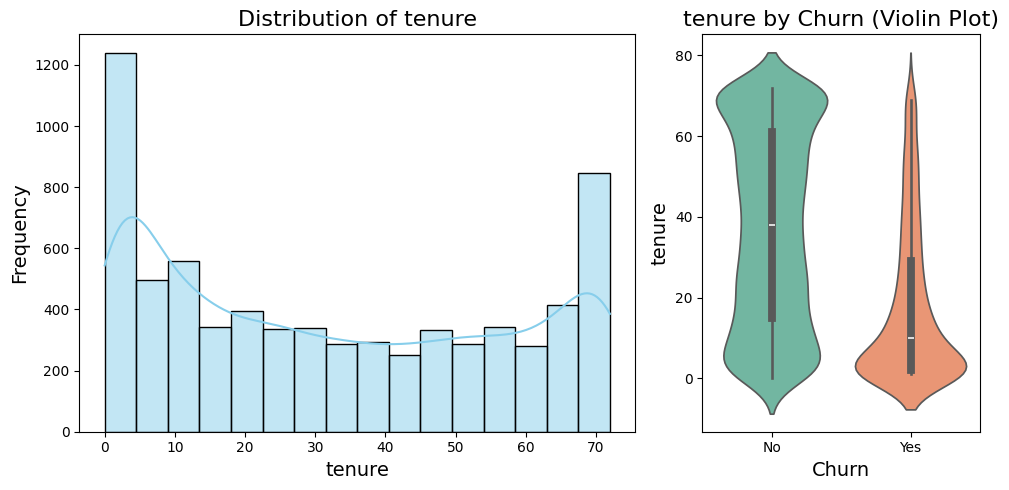

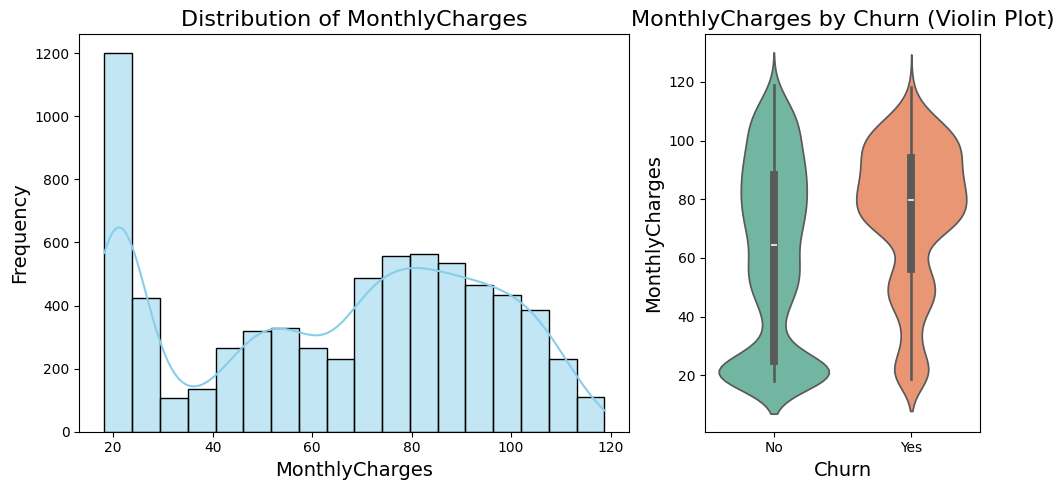

In [191]:
numerical_columns=data.select_dtypes(include='number').columns
for col in numerical_columns:
    # Create a figure with two subplots in a single row: one for histplot and one for violinplot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]})

    # Plot histogram with KDE for overall distribution
    sns.histplot(data=data, x=col, kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=16)
    axes[0].set_xlabel(col, fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)

    # Plot violin plot by Churn for the given numerical column
    sns.violinplot(x='Churn', y=col, data=data, palette='Set2', ax=axes[1])
    axes[1].set_title(f'{col} by Churn (Violin Plot)', fontsize=16)
    axes[1].set_xlabel('Churn', fontsize=14)
    axes[1].set_ylabel(col, fontsize=14)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Display the plots
    plt.show()

In [192]:
numerical_data=data.select_dtypes(include='number')
# Compute Q1, Q3, and IQR
Q1 = np.percentile(numerical_data, 25)
Q3 = np.percentile(numerical_data, 75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = numerical_data[(numerical_data < lower_bound) | (numerical_data> upper_bound)]
inliers = numerical_data[(numerical_data >= lower_bound) & (numerical_data <= upper_bound)]
print("Outliers:", outliers)

Outliers:       SeniorCitizen  tenure  MonthlyCharges
0               NaN     NaN             NaN
1               NaN     NaN             NaN
2               NaN     NaN             NaN
3               NaN     NaN             NaN
4               NaN     NaN             NaN
...             ...     ...             ...
7038            NaN     NaN             NaN
7039            NaN     NaN             NaN
7040            NaN     NaN             NaN
7041            NaN     NaN             NaN
7042            NaN     NaN             NaN

[7043 rows x 3 columns]


Text(0.5, 1.0, 'Boxplot to Detect Outliers')

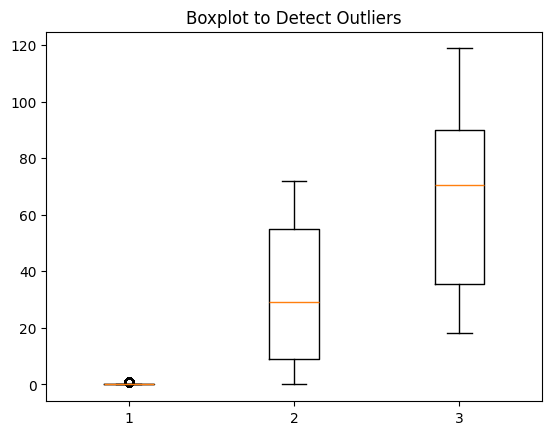

In [193]:
plt.boxplot(numerical_data)
plt.title("Boxplot to Detect Outliers")


<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

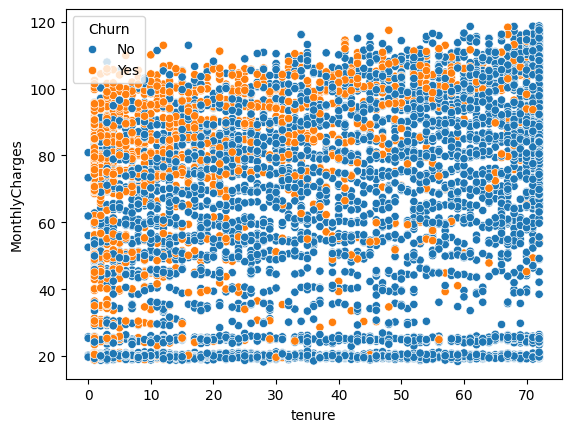

In [194]:
sns.scatterplot(data=data,x='tenure',y='MonthlyCharges',hue='Churn')

In [195]:
categorical_data=data.select_dtypes(include='object')

<Axes: >

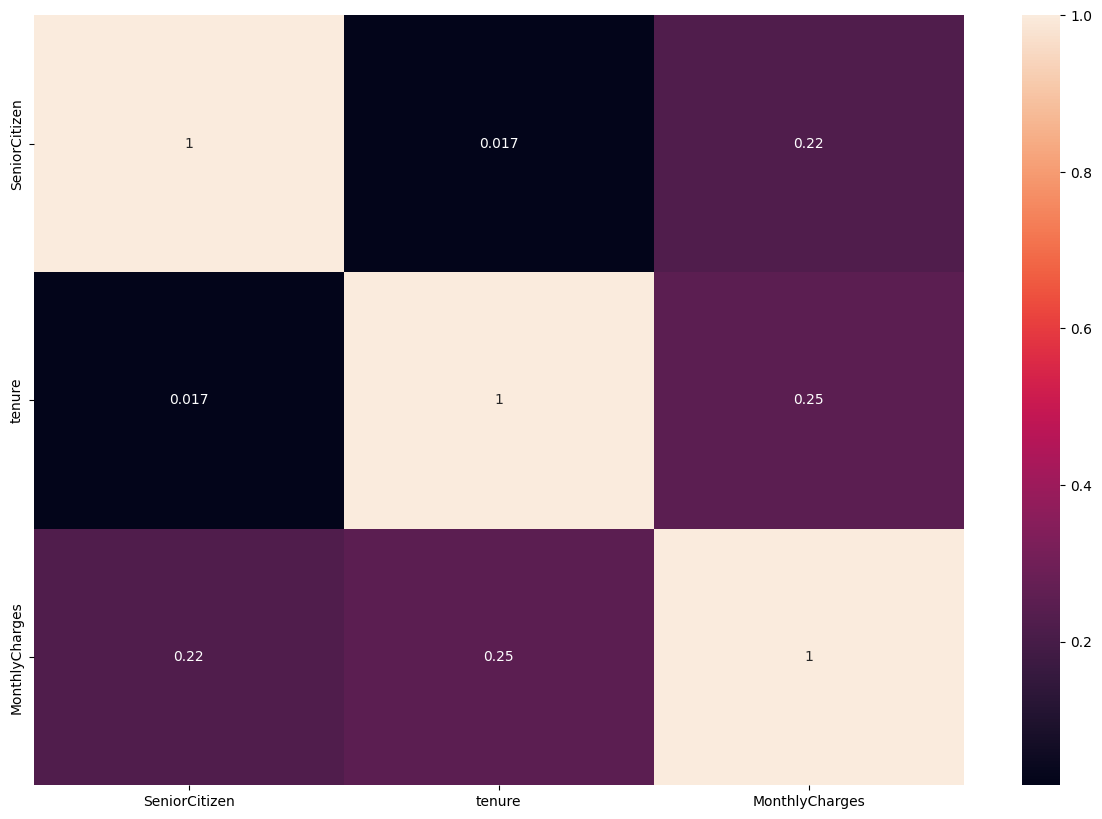

In [196]:

corr=numerical_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [197]:
label_encoder=LabelEncoder()
for col in categorical_data.columns:
  data[col]=label_encoder.fit_transform(data[col])

In [198]:
x=data.drop('Churn' ,axis=1)
y=data['Churn']

In [199]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [200]:
X_tain,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [201]:
svc=SVC()
svc.fit(X_tain,Y_train)

SVC()

In [202]:
y_pred=svc.predict(X_test)

In [203]:
svc_report=classification_report(Y_test,y_pred)
svc_confusionMatrix=confusion_matrix(Y_test,y_pred)
svc_accuracy=accuracy_score(Y_test,y_pred)

In [204]:
print(f'svc accuracy is {svc_accuracy}')
print(f'svc confusion matrix\n {svc_confusionMatrix}')
print(f'svc classification report:\n {svc_report}')

svc accuracy is 0.7991483321504613
svc confusion matrix
 [[948  88]
 [195 178]]
svc classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [205]:
knn=KNeighborsClassifier()
knn.fit(X_tain,Y_train)
y_pred=knn.predict(X_test)

In [206]:
knn_report=classification_report(Y_test,y_pred)
knn_confusionMatrix=confusion_matrix(Y_test,y_pred)
knn_accuracy=accuracy_score(Y_test,y_pred)

In [207]:
print(f'knn accuracy is {knn_accuracy}')
print(f'knn confusion matrix\n {knn_confusionMatrix}')
print(f'knn classification report:\n {knn_report}')

knn accuracy is 0.7735982966643009
knn confusion matrix
 [[899 137]
 [182 191]]
knn classification report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1036
           1       0.58      0.51      0.54       373

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [208]:
LR=LogisticRegression()
LR.fit(X_tain,Y_train)
y_pred=LR.predict(X_test)

In [209]:
LR_report=classification_report(Y_test,y_pred)
LR_confusionMatrix=confusion_matrix(Y_test,y_pred)
LR_accuracy=accuracy_score(Y_test,y_pred)

In [210]:
print(f'LR accuracy is {LR_accuracy}')
print(f'LR confusion matrix\n {LR_confusionMatrix}')
print(f'LR classification report:\n {LR_report}')

LR accuracy is 0.8147622427253371
LR confusion matrix
 [[940  96]
 [165 208]]
LR classification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [211]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_tain,Y_train)
y_pred=decision_tree.predict(X_test)

In [212]:
decision_tree_report=classification_report(Y_test,y_pred)
decision_tree_confusionMatrix=confusion_matrix(Y_test,y_pred)
decision_tree_accuracy=accuracy_score(Y_test,y_pred)

In [213]:
print(f'decision tree accuracy is {decision_tree_accuracy}')
print(f'decision tree confusion matrix\n {decision_tree_confusionMatrix}')
print(f'decision tree classification report:\n {decision_tree_report}')

decision tree accuracy is 0.7139815471965933
decision tree confusion matrix
 [[841 195]
 [208 165]]
decision tree classification report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1036
           1       0.46      0.44      0.45       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



In [214]:
RF=RandomForestClassifier(n_estimators=100,random_state=42)
RF.fit(X_tain,Y_train)
y_pred=RF.predict(X_test)

In [215]:
RF_report=classification_report(Y_test,y_pred)
RF_confusionMatrix=confusion_matrix(Y_test,y_pred)
RF_accuracy=accuracy_score(Y_test,y_pred)

In [216]:
print(f'Random Forest accuracy is {RF_accuracy}')
print(f'Random Forest confusion matrix\n {RF_confusionMatrix}')
print(f'Random Forest classification report:\n {RF_report}')

Random Forest accuracy is 0.7963094393186657
Random Forest confusion matrix
 [[942  94]
 [193 180]]
Random Forest classification report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [217]:
gradient_boosting=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1 ,max_depth=5,random_state=42)
gradient_boosting.fit(X_tain,Y_train)
y_pred=gradient_boosting.predict(X_test)

In [218]:
gradient_boosting_report=classification_report(Y_test,y_pred)
gradient_boosting_confusionMatrix=confusion_matrix(Y_test,y_pred)
gradient_boosting_accuracy=accuracy_score(Y_test,y_pred)

In [219]:
print(f'Gradient Boosting accuracy is {gradient_boosting_accuracy}')
print(f'Gradient Boosting confusion matrix\n {gradient_boosting_confusionMatrix}')
print(f'Gradient Boosting classification report:\n {gradient_boosting_report}')

Gradient Boosting accuracy is 0.8147622427253371
Gradient Boosting confusion matrix
 [[942  94]
 [167 206]]
Gradient Boosting classification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



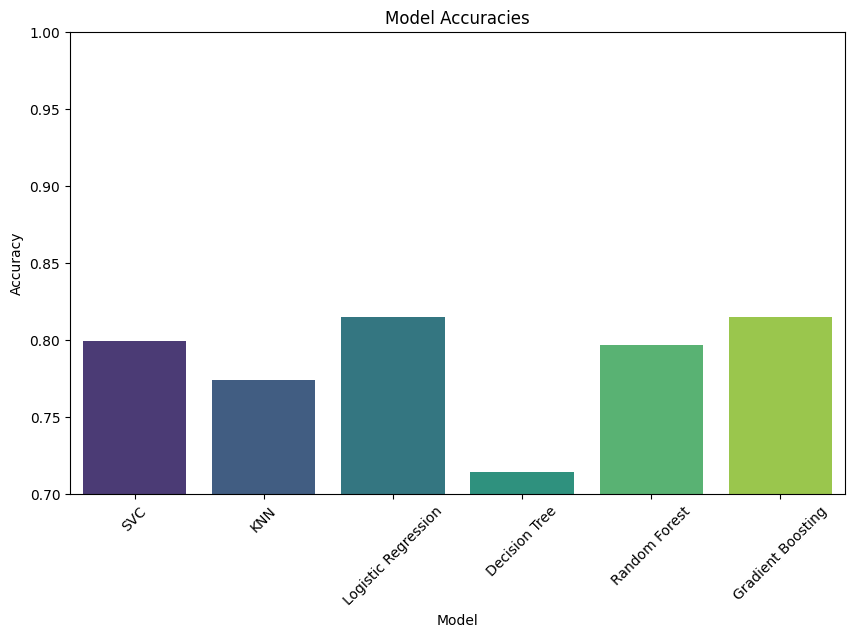

In [220]:
accuracies = {
    'SVC': svc_accuracy,
    'KNN': knn_accuracy,
    'Logistic Regression': LR_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': RF_accuracy,
    'Gradient Boosting': gradient_boosting_accuracy
}

# Create a bar plot of the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()),palette='viridis')
plt.xticks(rotation=45)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7,1)
plt.show()


**Highier Accuracies are Logistic Regression & Gradient Boosting = 81**